HW1: Multiclass SVM

-Example: Have a linear SVM kernel

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [34]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [35]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [36]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

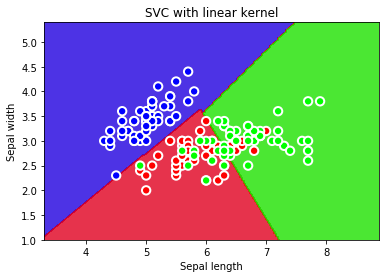

In [37]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.brg, edgecolor='white', lw=2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

-Example: Use SVM rbf kernel

SVM의 매개변수 tuning: C(linear, rbf), gamma(rbf)

In [38]:
from IPython.display import Image

In [39]:
Image(filename='7.png')

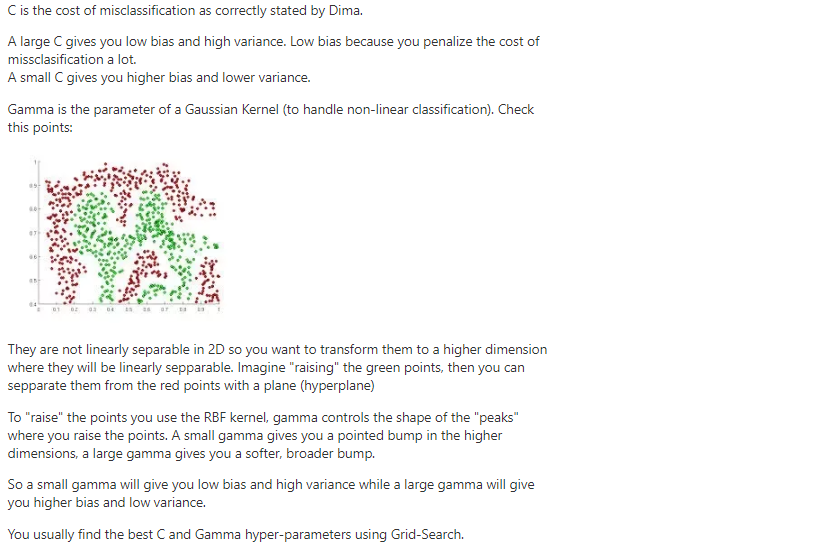

In [40]:
Image(filename="5.png")

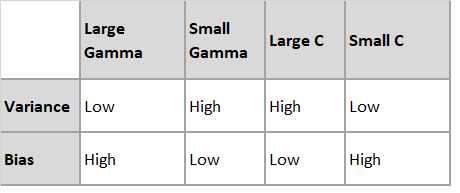

In [41]:
Image(filename="6.png")

C는 regularization term의 계수 
- C가 크면, penalty를 크게, 엄격하게(margin작게) -> 현 데이터에 overfitting -> low bias, high var
- C가 작으면, penalty를 작게, 덜 엄격하게(margin 크게) -> robust한 모델 -> high bias, low var    

상황에 따라 C를 적절하게 선택해줘야 합니다. Noise가 많은 데이터라면 C를 작게 하는 것이 좋고, Noise가 별로 없는 데이터라면 C를 크게 하는 것이 좋습니다.

gamma는 rbf kernel 사용시, 솟아오른 데이터 모양의(?) peak를 조절
- gamma가 크면, peak를 더 낮게 -> error를 더 잘 허용 -> high bias, low var
- gamma가 작으면, peak를 더 높게 -> error를 완강하게 -> low bias, high var

### cf)

In [42]:
import mglearn #랜덤한 데이터셋을 생성하거나 머신러닝 적용 결과를 보기좋게 표현하기 위한 함수들이 대부분

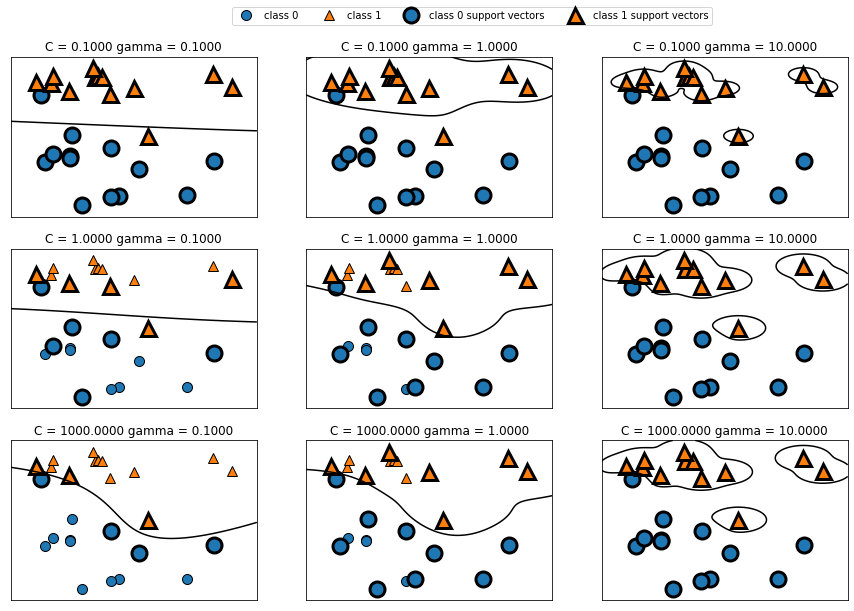

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"],
                  ncol=4, loc=(.9, 1.2))

### 다시 svm.SVC fitting으로 돌아와서...

In [70]:
svc = svm.SVC(kernel='rbf', C=1,gamma=0.01).fit(X, y)
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, 
# will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [71]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

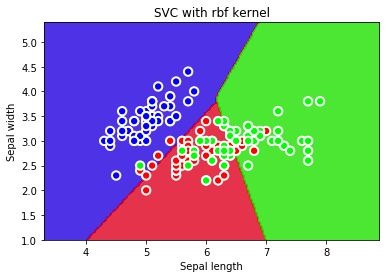

In [72]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.brg, edgecolor='white', lw=2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()

C와 gamma에 따른 SVM

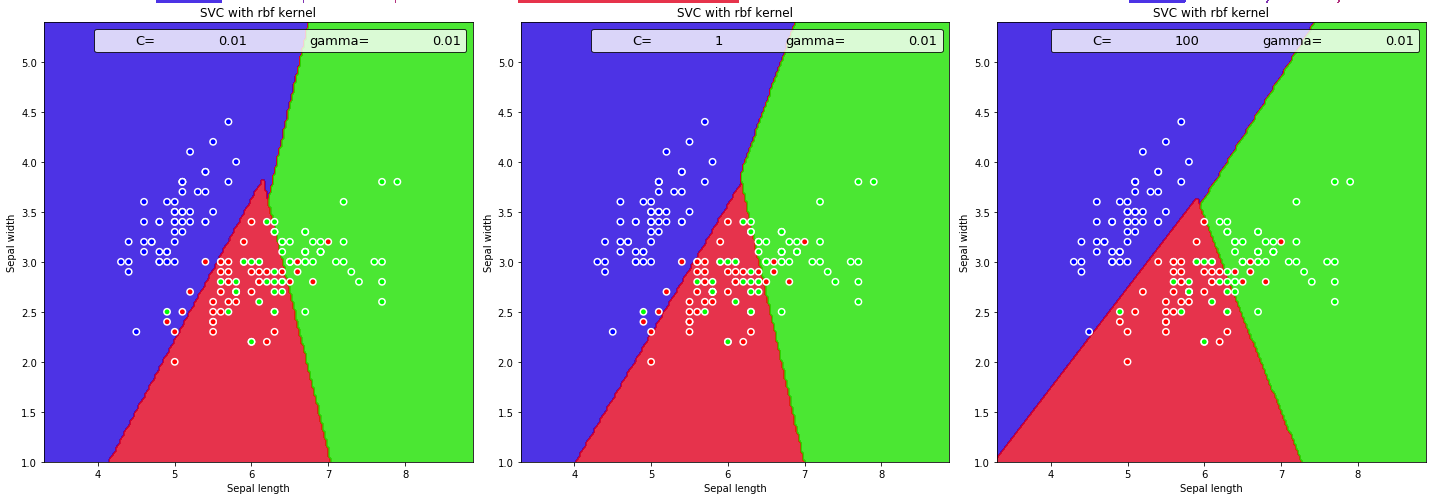

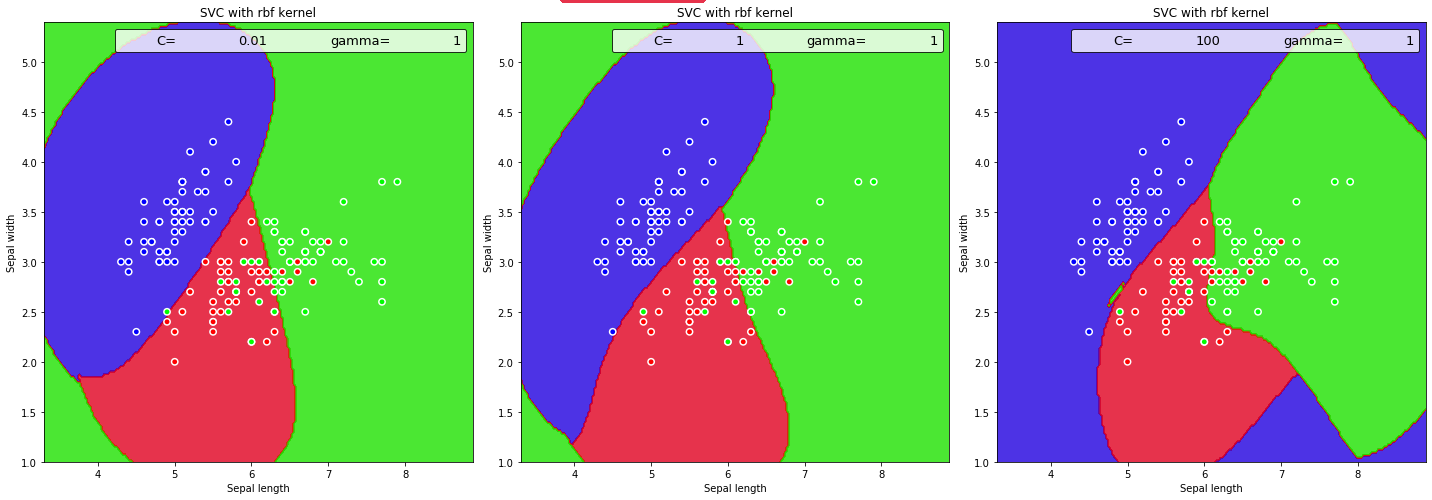

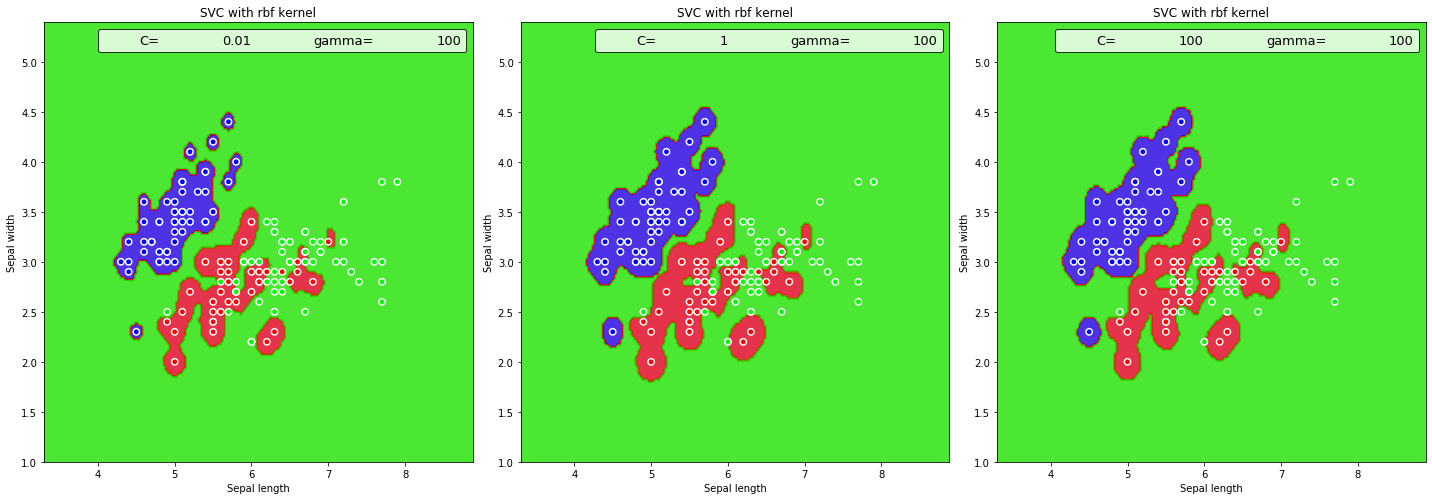

In [86]:
fig = plt.figure(figsize=(20,20))

k=1
while k < 4:
    for i in ([0.01, 1, 100]):
        svc = svm.SVC(kernel='rbf', C=i, gamma=0.01).fit(X, y)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
           
        ax = fig.add_subplot(3, 3, k)

        plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.brg, edgecolor='white', lw=1.5)
            
        plt.tight_layout()
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('SVC with rbf kernel')
        ax.legend(["C=", i, "gamma=", 0.01], ncol=4, loc='best', edgecolor='black', prop={"size":13})
            
        k += 1
            
plt.show()

fig = plt.figure(figsize=(20,20))

k=1
while k < 4:
    for i in ([0.01, 1, 100]):
        svc = svm.SVC(kernel='rbf', C=i, gamma=1).fit(X, y)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
           
        ax = fig.add_subplot(3, 3, k)

        plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.brg, edgecolor='white', lw=1.5)
            
        plt.tight_layout()
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('SVC with rbf kernel')
        ax.legend(["C=", i, "gamma=", 1], ncol=4, loc='best', edgecolor='black', prop={"size":13})
            
        k += 1
            
plt.show()

fig = plt.figure(figsize=(20,20))

k=1
while k < 4:
    for i in ([0.01, 1, 100]):
        svc = svm.SVC(kernel='rbf', C=i, gamma=100).fit(X, y)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
           
        ax = fig.add_subplot(3, 3, k)

        plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.brg, edgecolor='white', lw=1.5)
            
        plt.tight_layout()
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('SVC with rbf kernel')
        ax.legend(["C=", i, "gamma=", 100], ncol=4, loc='best', edgecolor='black', prop={"size":13})
            
        k += 1
            
plt.show()

In [ ]:
large gamma, small C 일 때 가장 high bias, low var (가장 robust(?)) - underfitting 방향
small gamma, large C 일 때 가장 low bias, high var (가장 flexible(?)) - overfitting 방향
